In [1]:
from matching.core import *
from matching.utils import *
from datetime import datetime

## Try different image sizes

In [ ]:
def run_sizes(width_list):
    query_files = get_image_files(QUERY_DIR)
    corrects = get_correct_matches()
    exacts, approx = [], []
    for width in width_list:
        size = (width, width)
        library_images = load_library(resize=size, gray=True)
        k = guess_k(library_images, algorithm='sift')
        print("Features will be grouped into {} clusters\n".format(k))
        tick = datetime.now()
        print("Preprocessing...")
        codebook, idf, lookup = preprocess(library_images, k=k)
        tock = datetime.now()
        print("Preprocessing takes {}\n".format(tock - tick))
        
        exact_match, approximate_match = 0, 0
        top = 3
        for name, path in query_files:
            sample_image = load_image(path, resize=size, gray=True)
            sparse_vector = calculate_sparse_vector(sample_image, codebook, idf)
            similarities = calculate_cosine_similarity(sparse_vector, lookup)
            result_vec = (-similarities).argsort()
            results = result_vec[0, : top].tolist()
            correct_matches = corrects[name]
            for i, r in enumerate(results):
                if r in correct_matches:
                    if i == 0:
                        exact_match += 1
                    approximate_match += 1
            matched_images = [library_images[i] for i in results]
            display_image(sample_image, *matched_images, col=4)
        ex_acc = exact_match / len(query_files)
        ap_acc = approximate_match / len(query_files)
        exacts.append(ex_acc)
        approx.append(ap_acc)
    return exacts, approx

Image does not have any keypoints extracted from sift algorithm,try a higher resolution
Features will be grouped into 336 clusters

Preprocessing...
Image does not have any keypoints extracted from sift algorithm,try a higher resolution
Preprocessing takes 0:00:01.450145



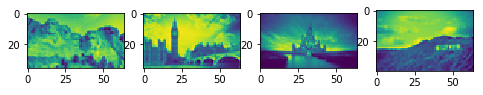

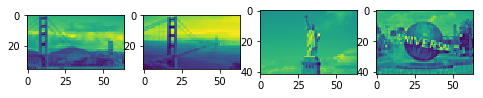

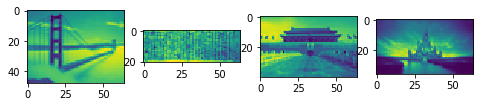

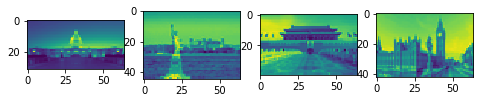

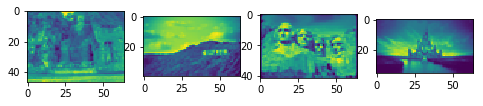

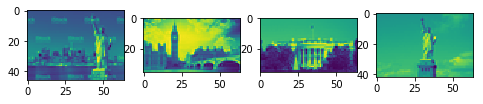

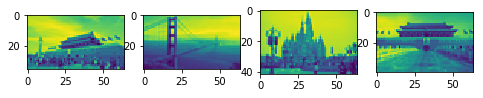

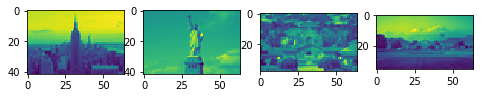

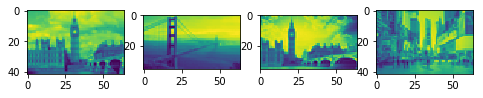

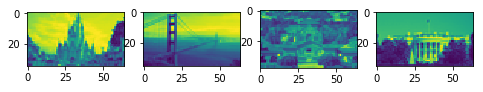

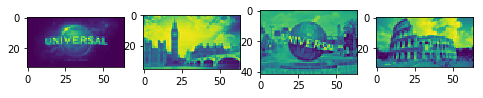

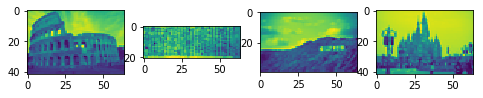

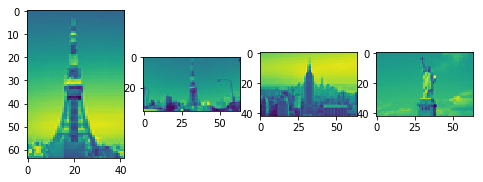

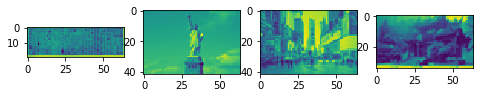

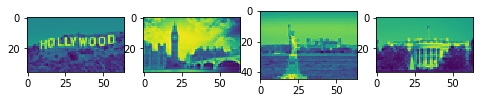

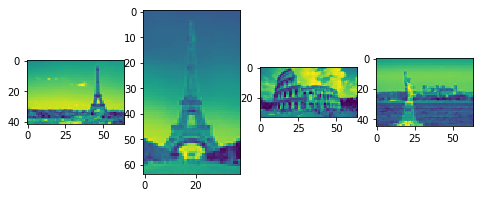

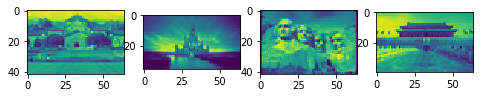

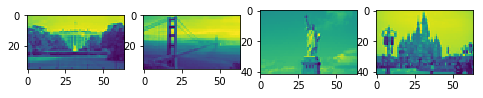

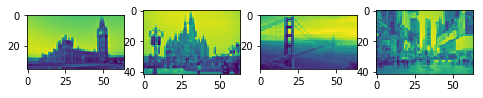

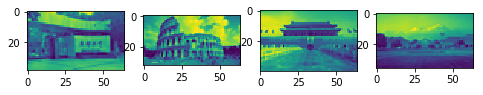

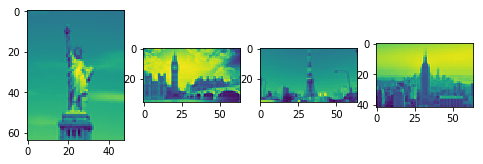

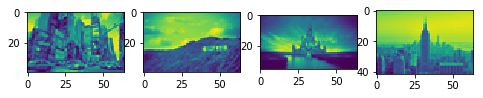

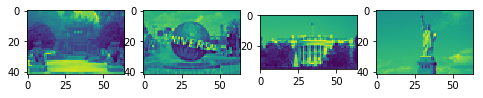

Features will be grouped into 936 clusters

Preprocessing...
Preprocessing takes 0:00:07.597222



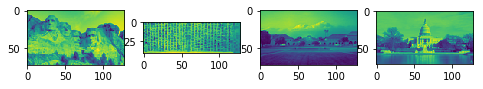

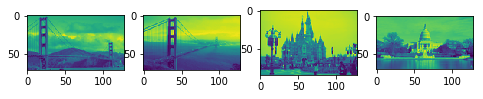

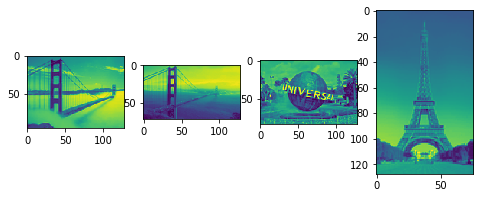

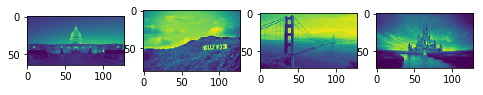

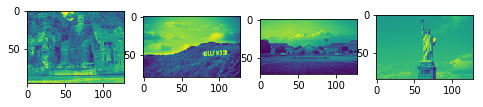

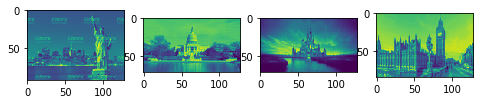

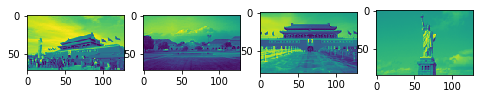

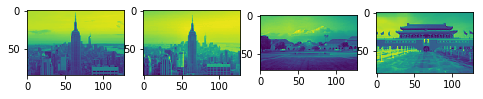

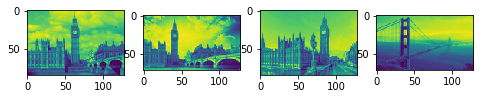

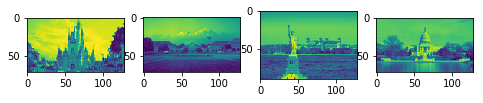

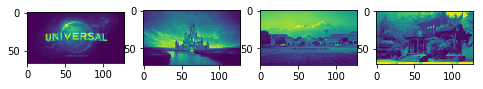

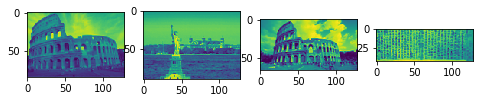

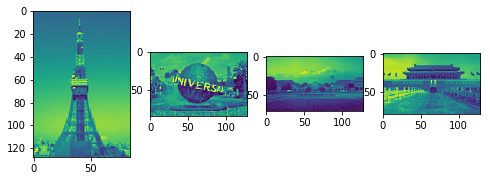

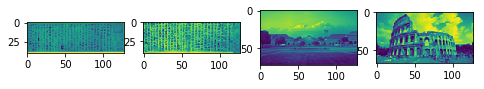

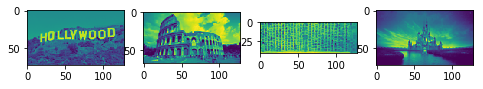

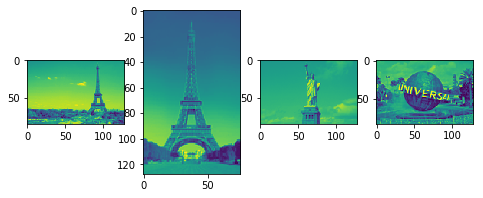

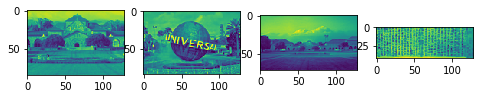

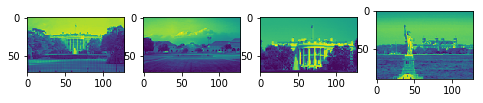

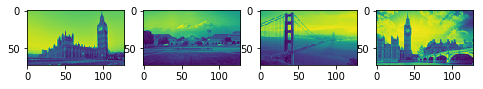

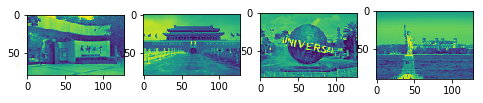

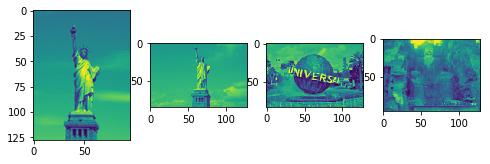

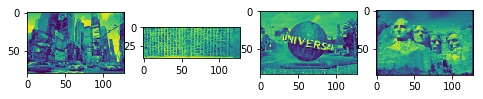

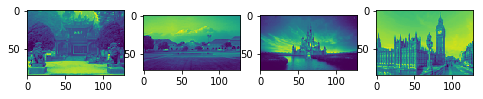

Features will be grouped into 2760 clusters

Preprocessing...
Preprocessing takes 0:01:19.105924



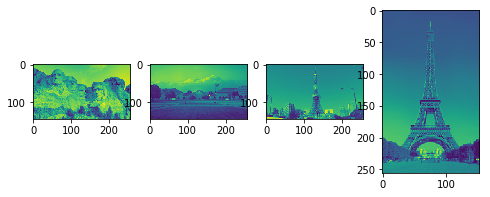

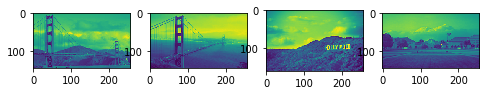

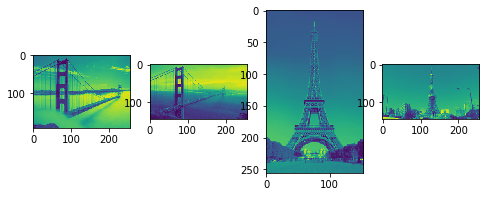

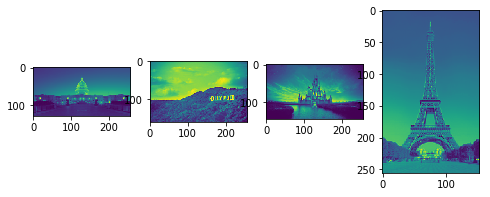

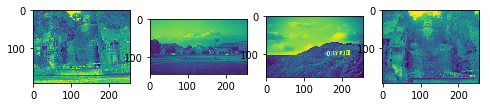

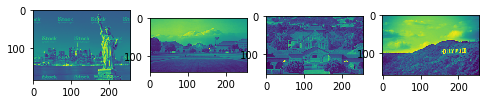

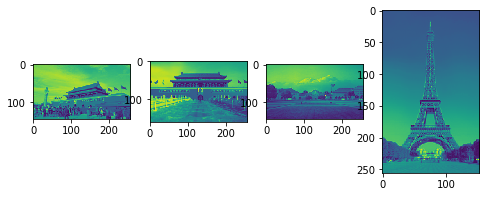

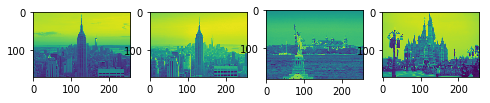

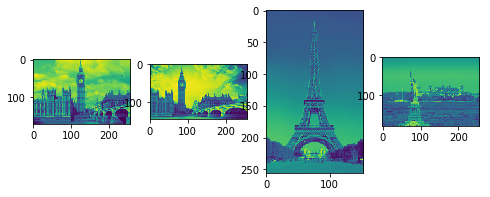

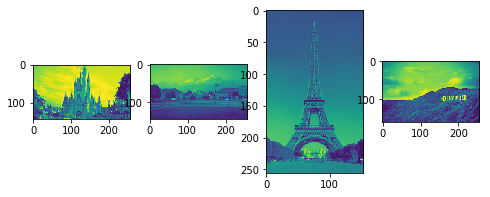

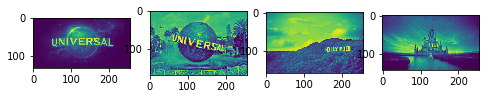

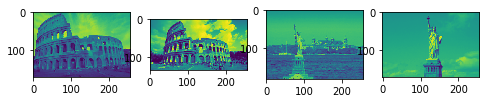

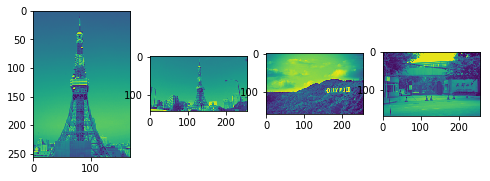

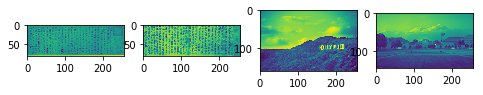

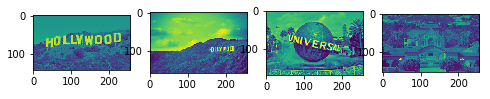

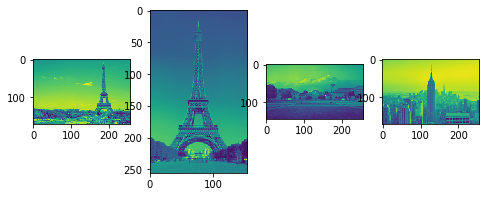

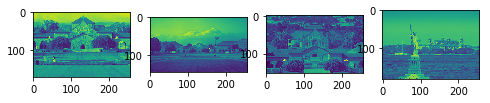

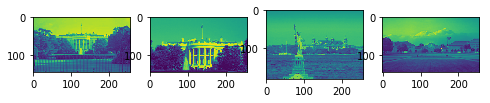

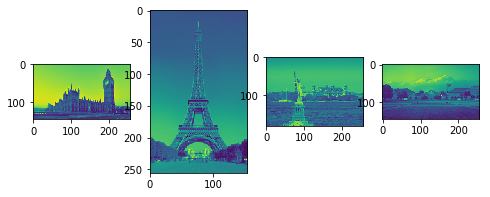

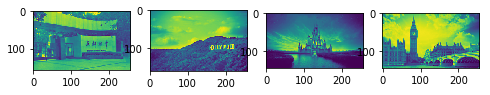

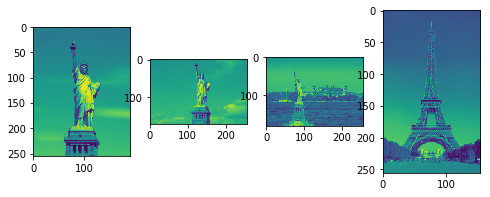

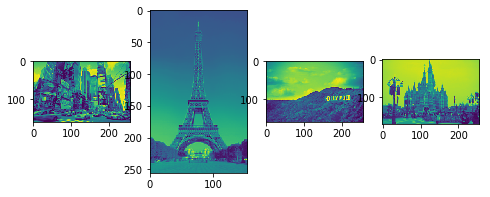

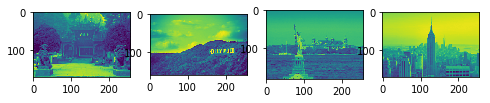

Features will be grouped into 7416 clusters

Preprocessing...
Preprocessing takes 0:12:16.388379



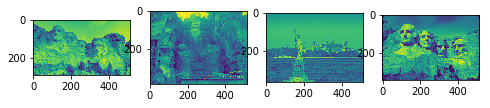

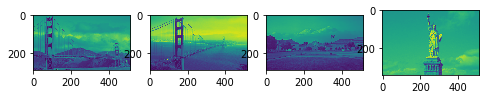

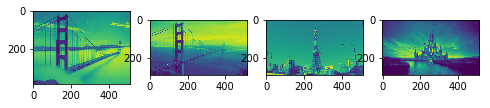

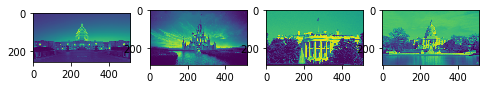

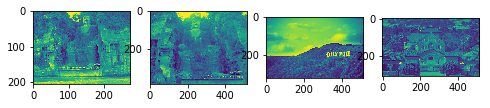

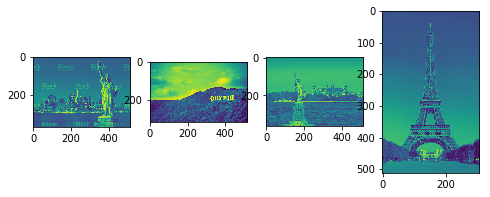

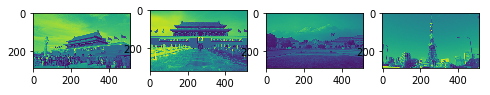

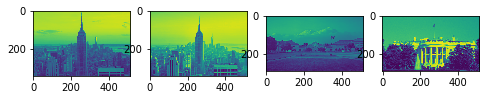

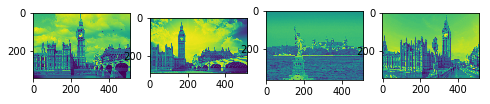

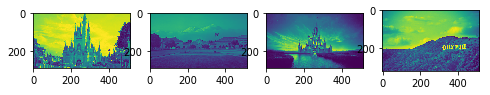

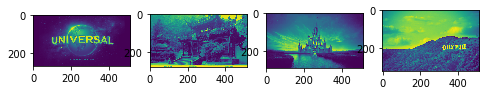

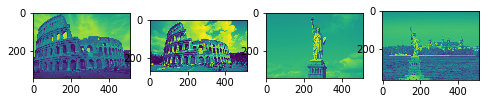

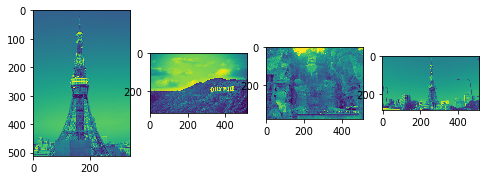

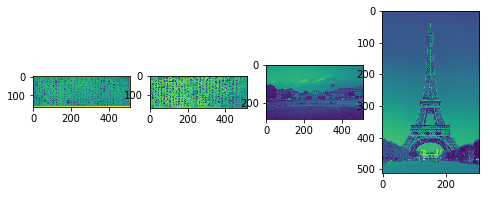

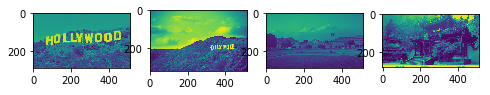

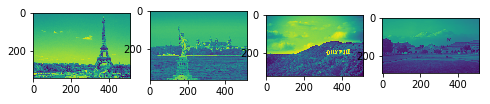

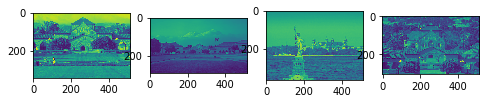

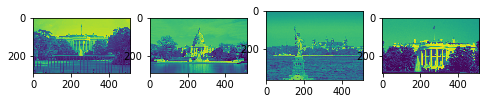

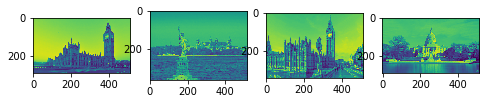

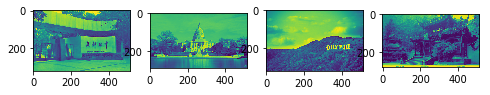

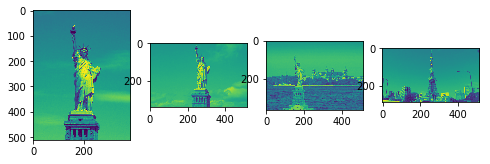

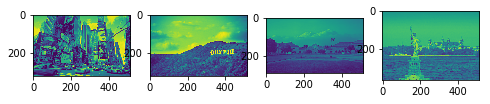

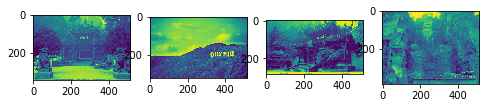

Features will be grouped into 21816 clusters

Preprocessing...


In [ ]:
e, a = run_sizes([64, 128, 256, 512, 1024])